https://towardsdev.com/how-to-produce-tables-for-bar-charts-in-python-23fe342d81ca

In [1]:
import pandas as pd
df = pd.read_csv("Profit.csv")

In [2]:
df

,Product Type,Quantity,Cost of Goods Sold,Net Sales,Gross Profit
0,appliances,117,48600.72,56981.19,8380.47
1,appliances,411,13210.11,21557.86,8347.75
2,appliances,88,35893.07,43389.54,7496.47
3,appliances,116,11968.00,17758.25,5790.25
4,appliances,196,18164.90,22459.24,4294.34
...,...,...,...,...,...
4477,beauty,12,856.80,0.00,-856.80
4478,beauty,16,3775.57,2906.86,-868.71
4479,beauty,14,1264.20,0.00,-1264.20
4480,life,181,5067.57,3632.08,-1435.49


In [4]:
import numpy as np
pivot = df.pivot_table(index='Product Type', 
                       values=['Quantity', 'Net Sales', 'Gross Profit'], 
                       aggfunc={'Quantity': np.mean, 'Net Sales': sum, 'Gross Profit': sum})

for col in pivot.columns:
    pivot[col] = pivot[col].astype('int')
pivot

,Gross Profit,Net Sales,Quantity
Product Type,,,
Default,-199,302,23
appliances,140290,581086,16
beauty,56844,365863,13
life,65512,260617,17
maternal,10574,50776,12
simple,69,213,1
snacks,6092,74099,49
variable,121,351,17


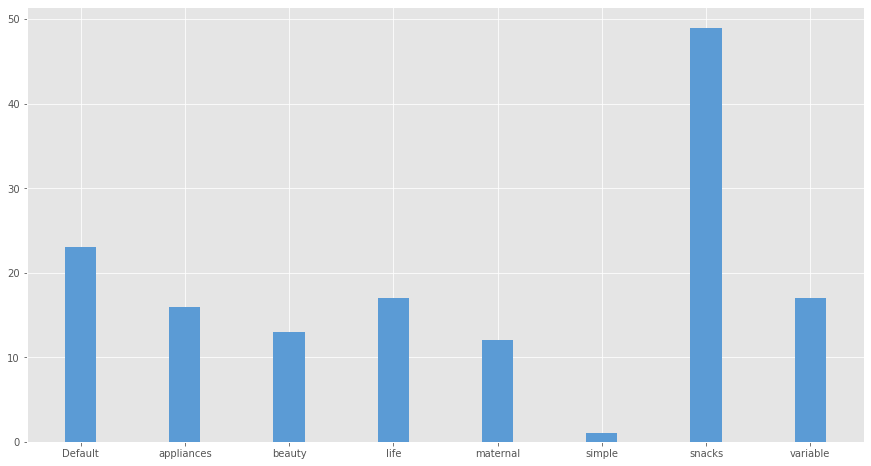

In [9]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15, 8))
plt.style.use('ggplot')

barchart=ax.bar(x=pivot.index, height=pivot['Quantity'], 
                 width=0.3, color='#5B9BD5', label='Average Quantity')
# ax.bar_label(barchart, labels=pivot['Quantity'])

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, '')]

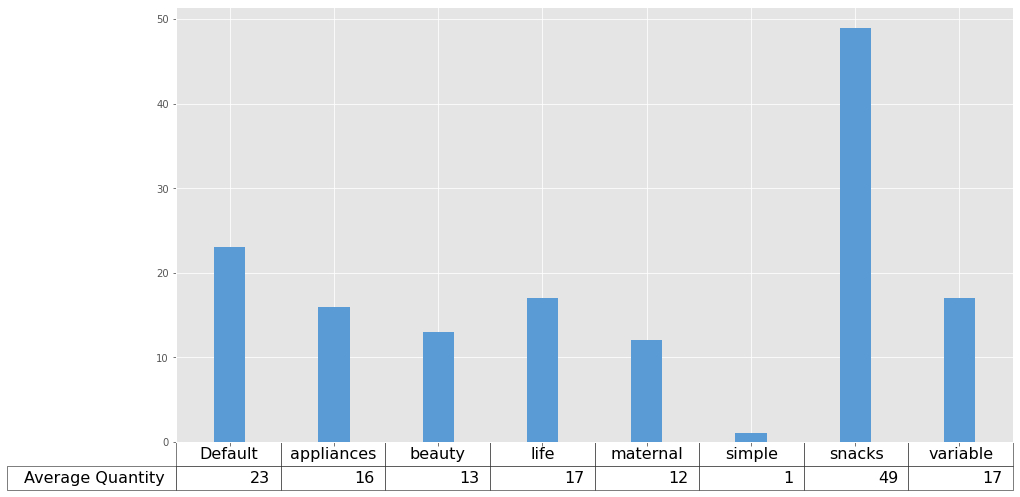

In [11]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15, 8))
plt.style.use('ggplot')

barchart=ax.bar(x=pivot.index, height=pivot['Quantity'], 
                 width=0.3, color='#5B9BD5', label='Average Quantity')
#ax.bar_label(barchart, labels=pivot['Quantity'])

cell_text=[[q for q in pivot['Quantity']]] # The table is a 2D array
t = plt.table(cellText=cell_text,          # Table text
              rowLabels=['Average Quantity'], # The label of the attribute
              colLabels=pivot.index,       # x axis label
              loc='bottom')                # Table location
t.set_fontsize(40) # Table text font size
t.scale(1, 2) # Set column width and row height
plt.gca().axes.xaxis.set_ticklabels([]) # Remove the x axis text to avoid overlapping

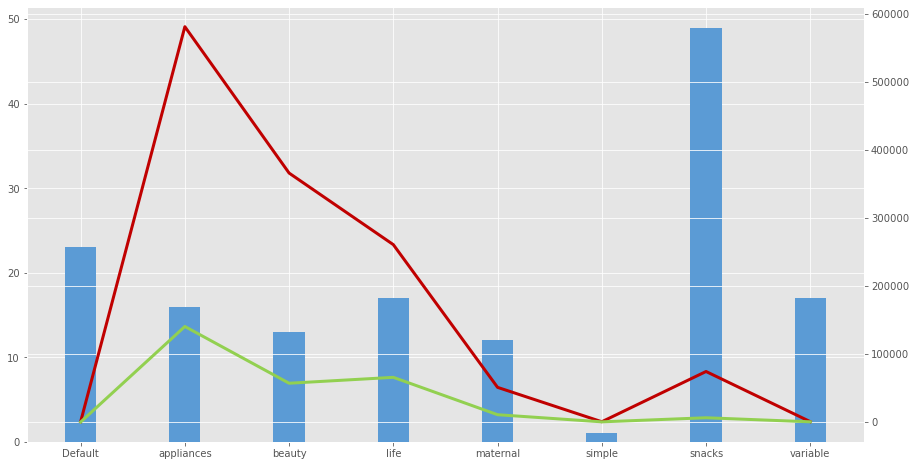

In [13]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15, 8))
plt.style.use('ggplot')

barchart=ax.bar(x=pivot.index, height=pivot['Quantity'], 
                 width=0.3, color='#5B9BD5', label='Average Quantity')
#ax.bar_label(barchart, labels=pivot['Quantity'])

ax2 = ax.twinx()
ax2.plot(pivot.index, pivot['Net Sales'], color='#C00000',
         linewidth=3, label='Net Sales')
ax2.plot(pivot.index, pivot['Gross Profit'], color='#92D050',
        linewidth=3, label='Gross Profit')

In [14]:
cell_text=[pivot[col].tolist() for col in pivot.columns]

cell_text

[[-199, 140290, 56844, 65512, 10574, 69, 6092, 121],
 [302, 581086, 365863, 260617, 50776, 213, 74099, 351],
 [23, 16, 13, 17, 12, 1, 49, 17]]

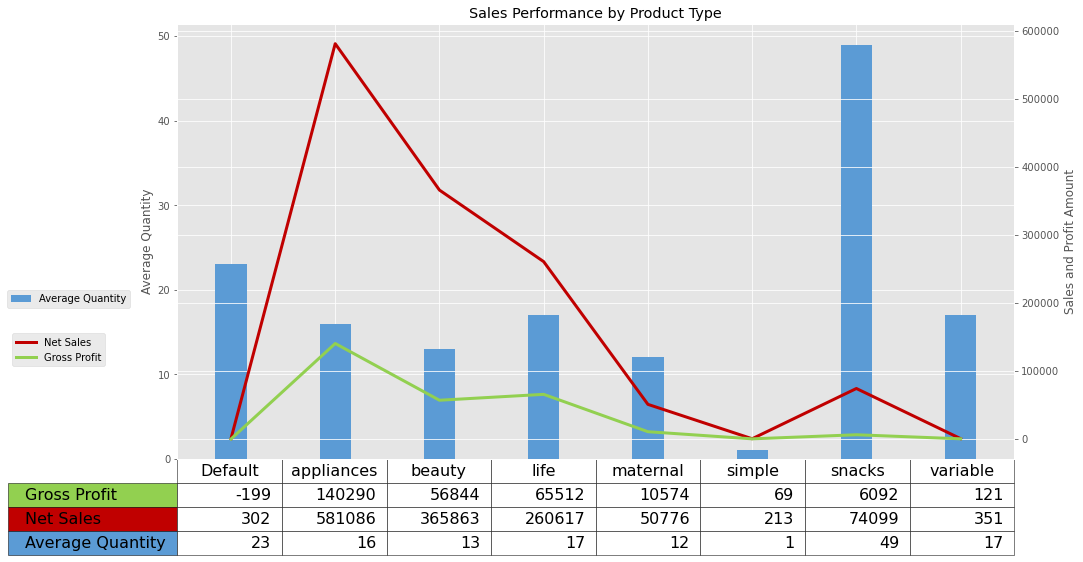

In [19]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15, 8))
plt.style.use('ggplot')

barchart=ax.bar(x=pivot.index, height=pivot['Quantity'], 
                 width=0.3, color='#5B9BD5', label='Average Quantity')
# ax.bar_label(barchart, labels=pivot['Quantity'])

ax2 = ax.twinx()
ax2.plot(pivot.index, pivot['Net Sales'], color='#C00000',
         linewidth=3, label='Net Sales')
ax2.plot(pivot.index, pivot['Gross Profit'], color='#92D050',
        linewidth=3, label='Gross Profit')

cell_text=[pivot[col].tolist() for col in pivot.columns]
t = plt.table(cellText=cell_text,     # Table text
             rowLabels=list(pivot.columns)[:2]+['Average Quantity'], # This time, the labels of attribute contained in a list
             colLabels=pivot.index,   # x axis label
             loc='bottom',            # Table location
             rowColours=['#92D050', '#C00000', '#5B9BD5'])     # Label colors 
#t = plt.table(cellText=cell_text,     # Table text
#             rowLabels=list(pivot.columns)[:2]+['Average Quantity'], # This time, the labels of attribute contained in a list
#             colLabels=pivot.index,   # x axis label
#             loc='bottom')            # Table location
t.set_fontsize(40) # Table text font size
t.scale(1, 2) # Set column width and row height
plt.gca().axes.xaxis.set_ticklabels([]) # Remove the x axis text to avoid overlapping
plt.title('Sales Performance by Product Type')
plt.xlabel('Product Type')
ax.set_ylabel('Average Quantity')
ax2.set_ylabel('Sales and Profit Amount')

ax.legend(bbox_to_anchor=(-0.05, 0.4))
ax2.legend(bbox_to_anchor=(-0.08, 0.3))

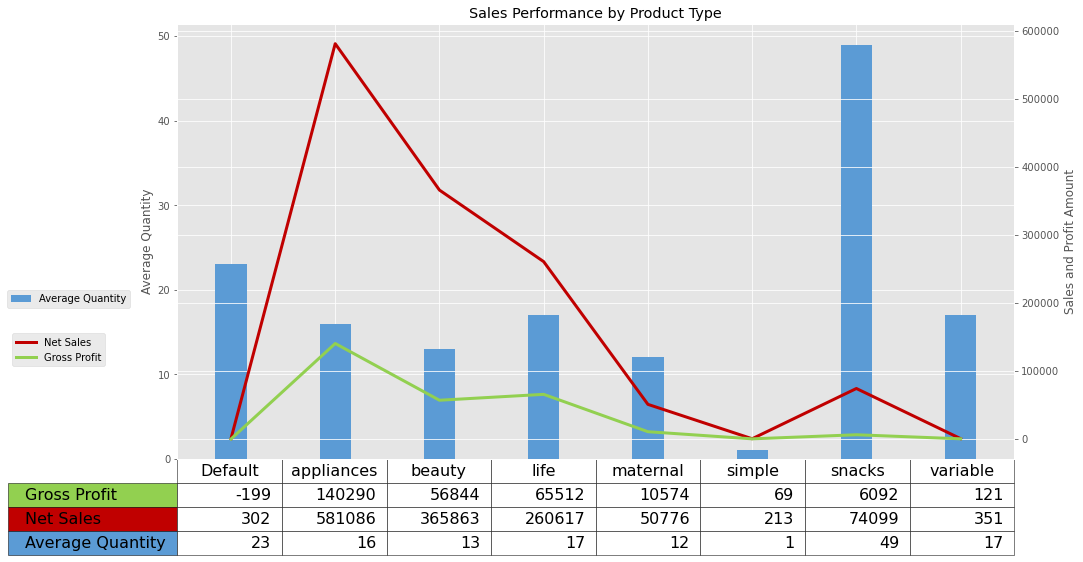

In [21]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15, 8))
plt.style.use('ggplot')

barchart=ax.bar(x=pivot.index, height=pivot['Quantity'], 
                 width=0.3, color='#5B9BD5', label='Average Quantity')
# ax.bar_label(barchart, labels=pivot['Quantity'])
ax.legend()

ax2 = ax.twinx()
ax2.plot(pivot.index, pivot['Net Sales'], color='#C00000',
         linewidth=3, label='Net Sales')
ax2.plot(pivot.index, pivot['Gross Profit'], color='#92D050',
        linewidth=3, label='Gross Profit')

cell_text=[pivot[col].tolist() for col in pivot.columns]

t = plt.table(cellText=cell_text,     # Table text
             rowLabels=list(pivot.columns)[:2]+['Average Quantity'], # This time, the labels of attribute contained in a list
             colLabels=pivot.index,   # x axis label
             loc='bottom',            # Table location
             rowColours=['#92D050', '#C00000', '#5B9BD5'])     # Label colors       
t.set_fontsize(40) # Table text font size
t.scale(1, 2) # Set column width and row height
plt.gca().axes.xaxis.set_ticklabels([]) # Remove the x axis text to avoid overlapping

plt.title('Sales Performance by Product Type')
plt.xlabel('Product Type')
ax.set_ylabel('Average Quantity')
ax2.set_ylabel('Sales and Profit Amount')

ax.legend(bbox_to_anchor=(-0.05, 0.4))
ax2.legend(bbox_to_anchor=(-0.08, 0.3))